In [1]:
include(".\\common\\layers.jl")
using Main.JLlayers
using DelimitedFiles
using Random

### read spiral data

In [2]:
data = readdlm("data/sprial.dat");
data[1:5, :]

5×3 Array{Float64,2}:
 -0.0     0.0     0.0
 -0.001   0.01    0.0
  0.0051  0.0193  0.0
 -0.0004  0.03    0.0
  0.0143  0.0374  0.0

### one_hot

In [3]:
function one_hot(x::Array{Float64, 1}; num=3)
    ans = zeros(size(x)[1], num)
    for i in 1:size(x)[1]
        idx = Int(x[i]) + 1
        ans[i, idx] = 1
    end
    return ans
end

one_hot (generic function with 1 method)

### Debug

In [4]:
x1 = data[1:5, 1:2]
t1 = data[1:5, 3]
to = one_hot(t1)
println(x1, ",", size(x1))
println(t1, ",", size(t1))
println(to)

[-0.0 0.0; -0.001 0.01; 0.0051 0.0193; -0.0004 0.03; 0.0143 0.0374],(5, 2)
[0.0, 0.0, 0.0, 0.0, 0.0],(5,)
[1.0 0.0 0.0; 1.0 0.0 0.0; 1.0 0.0 0.0; 1.0 0.0 0.0; 1.0 0.0 0.0]


In [5]:
batch_size = 1
hidden_size = 10
data_size = size(x1)[1]
max_iters = data_size // batch_size
net = TwoLayerNet{Float64}(2, hidden_size, 3)

TwoLayerNet{Float64}(AffineLayer{Float64}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #undef, [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), SigmoidLayer{Float64}(#undef), AffineLayer{Float64}([0.0 0.0 0.0; 0.0 0.0 0.0; … ; 0.0 0.0 0.0; 0.0 0.0 0.0], [0.0, 0.0, 0.0], #undef, [0.0 0.0 0.0; 0.0 0.0 0.0; … ; 0.0 0.0 0.0; 0.0 0.0 0.0], [0.0, 0.0, 0.0]), SoftmaxWithLossLayer{Float64}(3.9282128e-316, #undef, #undef))

In [6]:
net = TwoLayerNet{Float64}(2, 10, 3)
println(forward(net, x1, to))
ypred = predict(net, x1[:, :])
println(gradient(net, x1, to))

1.0986121886681097
(1.0986121886681097, Main.JLlayers.TwoLayerNetGrads{Float64}([0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-0.333333 0.166667 0.166667; -0.333333 0.166667 0.166667; -0.333333 0.166667 0.166667; -0.333333 0.166667 0.166667; -0.333333 0.166667 0.166667; -0.333333 0.166667 0.166667; -0.333333 0.166667 0.166667; -0.333333 0.166667 0.166667; -0.333333 0.166667 0.166667; -0.333333 0.166667 0.166667], [-0.666667, 0.333333, 0.333333]))


### Training

In [7]:
max_epoch = 1;
batch_size = 30;
hidden_size = 10;
learning_rate = 0.1;

In [8]:
x = data[:, 1:2]
t = data[:, 3]
to = one_hot(t)
data_size = size(x)[1]
max_iters = data_size // batch_size
net = TwoLayerNet{Float64}(2, hidden_size, 3)

TwoLayerNet{Float64}(AffineLayer{Float64}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #undef, [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), SigmoidLayer{Float64}(#undef), AffineLayer{Float64}([0.0 0.0 0.0; 0.0 0.0 0.0; … ; 0.0 0.0 0.0; 0.0 0.0 0.0], [0.0, 0.0, 0.0], #undef, [0.0 0.0 0.0; 0.0 0.0 0.0; … ; 0.0 0.0 0.0; 0.0 0.0 0.0], [0.0, 0.0, 0.0]), SoftmaxWithLossLayer{Float64}(5.7488506e-316, #undef, #undef))

In [9]:
data = readdlm("data/sprial.dat");
max_epoch = 300;
batch_size = 30;
hidden_size = 10;
learning_rate = 1.0;
net = TwoLayerNet{Float64}(2, hidden_size, 3)
# @show model.a1l.W
# @show model.a1l.b
# @show model.a2l.W
# @show model.a2l.b
data_size = size(data)[1]
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in 1:max_epoch
    # println("epoch $epoch")
    
    # shuffle data
    # idx = randperm(data_size)
    # println(idx)
    idx = 1:300
    data = data[idx, :]
    xorg = data[1:end, 1:2]
    torg = one_hot(data[1:end, 3])
    

    # for each batch
    for iters in 1:max_iters
        iters = Int(iters)
        ix = 1 + (iters - 1) * batch_size
        bX = xorg[ix:(ix + batch_size) - 1, :]
        bT = torg[ix:(ix + batch_size) - 1, :]
        # print(bX)
        
        # @show bX
         # display(bT)

        # println("batch $iters, loss $ls")
        _loss, grad = gradient(net, bX, bT)
        if iters == 1
            # println(_loss)
            # println(grad.W1)
            # println(grad.b1)
            # println(grad.W2)
            # println(grad.b2)
        end
        applygradient!(net, grad, learning_rate)
        # println("$ix $iters $_loss")
        total_loss += _loss
        loss_count += 1
        
        # 定期的に学習経過を出力
        if iters % 10 == 0
            avg_loss = total_loss / loss_count
            println("epoch $epoch   loss $(avg_loss)")
            push!(loss_list, avg_loss)
            total_loss, loss_count = 0, 0
        end
    end
end

epoch 1   loss 1.893694548041942
epoch 2   loss 2.040286908915635
epoch 3   loss 1.8535330473622547
epoch 4   loss 1.7153077229713063
epoch 5   loss 1.623138842249491
epoch 6   loss 1.5599221967750712
epoch 7   loss 1.5151506006211044
epoch 8   loss 1.4824242275520274
epoch 9   loss 1.4578077383467642
epoch 10   loss 1.4388164908643024
epoch 11   loss 1.423834947275846
epoch 12   loss 1.4117827877300548
epoch 13   loss 1.401918591890376
epoch 14   loss 1.3937212226387714
epoch 15   loss 1.386816262993173
epoch 16   loss 1.38092926037995
epoch 17   loss 1.3758553152465018
epoch 18   loss 1.3714388671747708
epoch 19   loss 1.367559984073432
epoch 20   loss 1.36412488526467
epoch 21   loss 1.3610592755378281
epoch 22   loss 1.3583035801978567
epoch 23   loss 1.355809488304407
epoch 24   loss 1.3535374111927871
epoch 25   loss 1.351454591694927
epoch 26   loss 1.3495336833485765
epoch 27   loss 1.3477516746784146
epoch 28   loss 1.3460890714342129
epoch 29   loss 1.3445292757945657
epoch 3

In [10]:
using PyPlot

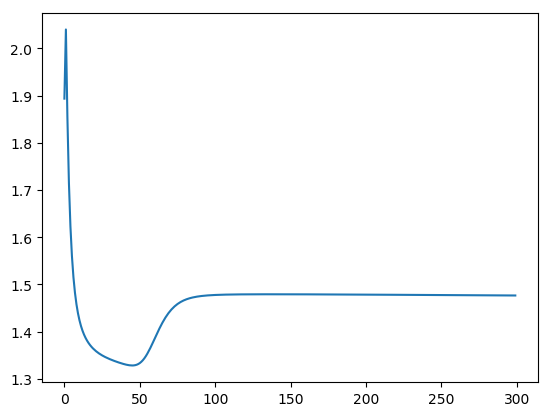

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000032BC5400>

In [11]:
plot(loss_list)